In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import scipy.ndimage as ndi 

In [2]:

train_dir = '/Users/chamidiperera/Documents/Care/careBackEnd/Skin Datasets/train'
validation_dir = '/Users/chamidiperera/Documents/Care/careBackEnd/Skin Datasets/validate'
test_dir = '/Users/chamidiperera/Documents/Care/careBackEnd/Skin Datasets/test'

In [3]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 5141 images belonging to 5 classes.


In [7]:

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 402 images belonging to 5 classes.


In [6]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 374 images belonging to 5 classes.


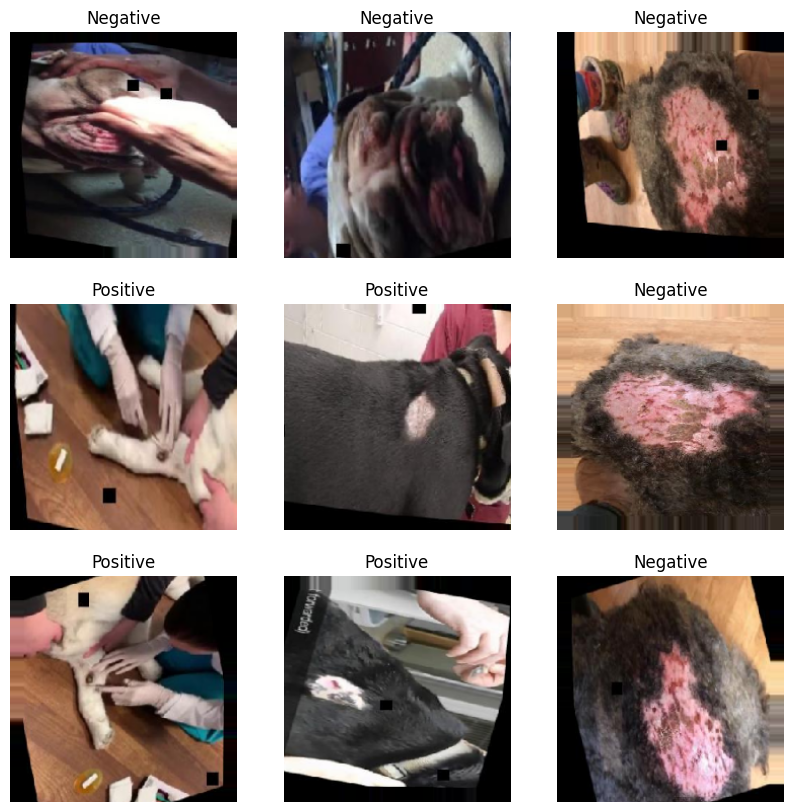

In [8]:

batch = train_generator.next()  
images, labels = batch[0], batch[1]

label_names = ['Negative', 'Positive']  

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    

    label = label_names[int(labels[i][0])]  
    
    plt.title(label)
    plt.axis("off")
plt.show()


In [9]:

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:

history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stop])

Epoch 1/20
161/161 [==============================] - 40s 243ms/step - loss: 0.7761 - accuracy: 0.7240 - val_loss: 0.3540 - val_accuracy: 0.8507
Epoch 2/20
161/161 [==============================] - 42s 258ms/step - loss: 0.4344 - accuracy: 0.8374 - val_loss: 0.2636 - val_accuracy: 0.9204
Epoch 3/20
161/161 [==============================] - 46s 286ms/step - loss: 0.3403 - accuracy: 0.8714 - val_loss: 0.2476 - val_accuracy: 0.9154
Epoch 4/20
161/161 [==============================] - 49s 302ms/step - loss: 0.3029 - accuracy: 0.8899 - val_loss: 0.1511 - val_accuracy: 0.9577
Epoch 5/20
161/161 [==============================] - 48s 299ms/step - loss: 0.2764 - accuracy: 0.9004 - val_loss: 0.1846 - val_accuracy: 0.9279
Epoch 6/20
161/161 [==============================] - 48s 300ms/step - loss: 0.2566 - accuracy: 0.9111 - val_loss: 0.1846 - val_accuracy: 0.9403
Epoch 7/20
161/161 [==============================] - 50s 308ms/step - loss: 0.2298 - accuracy: 0.9166 - val_loss: 0.2119 - val_ac

In [12]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

12/12 [==============================] - 3s 214ms/step - loss: 0.2634 - accuracy: 0.9171
Test Accuracy: 0.9171122908592224


In [13]:

model.save('MobileNetV2_multi_skin.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


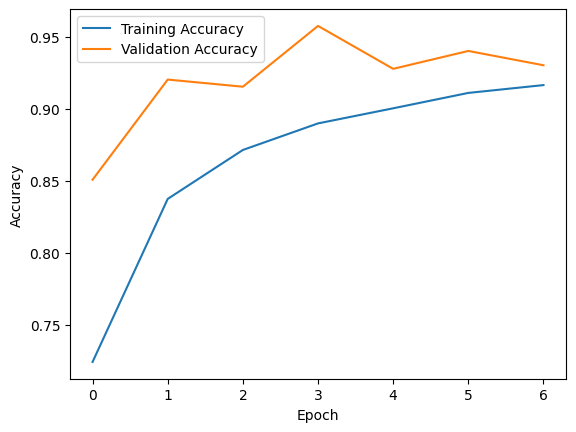

In [14]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()